In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/Research_Internship/heart.csv'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Research_Internship/heart.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Split features and target
X = data.drop('target', axis=1).values
y = data['target'].values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
# Initialize the model
input_size = X_train.shape[1]
model = MLPModel(input_size)

FloatSlider(value=0.001, continuous_update=False, description='Learning Rate:', max=0.01, min=0.0001, step=0.0…

IntSlider(value=100, continuous_update=False, description='Epochs:', max=500, min=10, step=10)

Training with Learning Rate: 0.0002, Epochs: 330
Epoch [10/330], Loss: 0.6727
Epoch [20/330], Loss: 0.6592
Epoch [30/330], Loss: 0.6452
Epoch [40/330], Loss: 0.6303
Epoch [50/330], Loss: 0.6140
Epoch [60/330], Loss: 0.5961
Epoch [70/330], Loss: 0.5765
Epoch [80/330], Loss: 0.5554
Epoch [90/330], Loss: 0.5328
Epoch [100/330], Loss: 0.5091
Epoch [110/330], Loss: 0.4847
Epoch [120/330], Loss: 0.4602
Epoch [130/330], Loss: 0.4369
Epoch [140/330], Loss: 0.4152
Epoch [150/330], Loss: 0.3957
Epoch [160/330], Loss: 0.3782
Epoch [170/330], Loss: 0.3626
Epoch [180/330], Loss: 0.3488
Epoch [190/330], Loss: 0.3366
Epoch [200/330], Loss: 0.3258
Epoch [210/330], Loss: 0.3165
Epoch [220/330], Loss: 0.3083
Epoch [230/330], Loss: 0.3011
Epoch [240/330], Loss: 0.2947
Epoch [250/330], Loss: 0.2889
Epoch [260/330], Loss: 0.2835
Epoch [270/330], Loss: 0.2787
Epoch [280/330], Loss: 0.2741
Epoch [290/330], Loss: 0.2699
Epoch [300/330], Loss: 0.2659
Epoch [310/330], Loss: 0.2622
Epoch [320/330], Loss: 0.2586


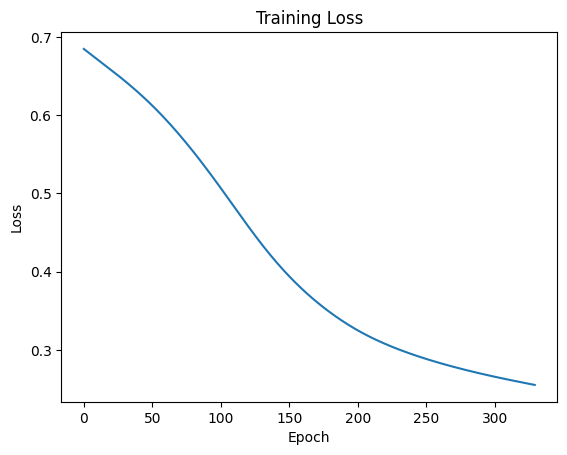

Training with Learning Rate: 0.0002, Epochs: 90
Epoch [10/90], Loss: 0.7036
Epoch [20/90], Loss: 0.6904
Epoch [30/90], Loss: 0.6777
Epoch [40/90], Loss: 0.6650
Epoch [50/90], Loss: 0.6515
Epoch [60/90], Loss: 0.6368
Epoch [70/90], Loss: 0.6207
Epoch [80/90], Loss: 0.6034
Epoch [90/90], Loss: 0.5849


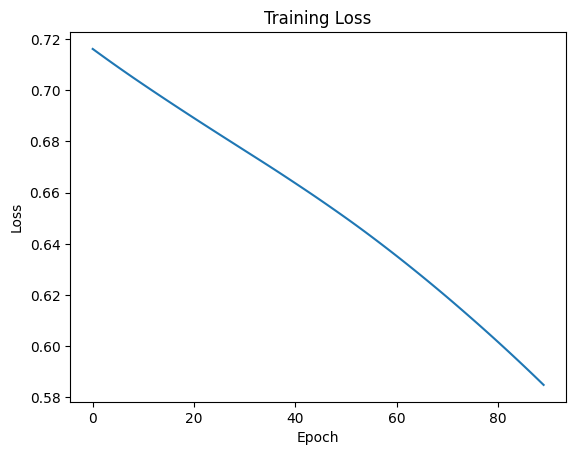

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCELoss()

lr_slider = widgets.FloatSlider(
    value=0.001,
    min=0.0001,
    max=0.01,
    step=0.0001,
    description='Learning Rate:',
    continuous_update=False
)

epoch_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=500,
    step=10,
    description='Epochs:',
    continuous_update=False
)

display(lr_slider, epoch_slider)

def train_model(lr, epochs):
    model = MLPModel(input_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    return model, losses

def update_model(*args):
    lr = lr_slider.value
    epochs = epoch_slider.value
    print(f'Training with Learning Rate: {lr}, Epochs: {epochs}')
    model, losses = train_model(lr, epochs)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [ ]:

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        predicted = (predictions > 0.5).float()

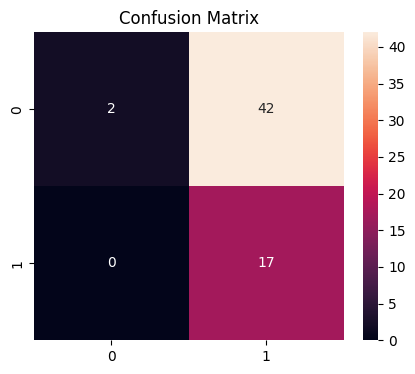

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted.numpy())
plt.figure(figsize=(5, 4))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

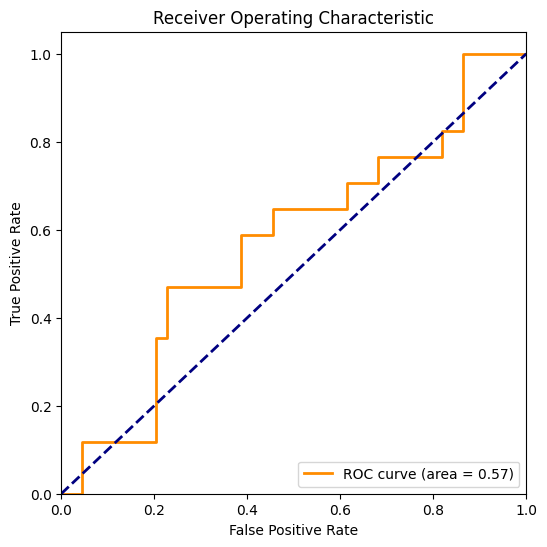

In [ ]:
        # ROC curve
        fpr, tpr, thresholds = roc_curve(y_test.numpy(), predictions.numpy())
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

lr_slider.observe(update_model, 'value')
epoch_slider.observe(update_model, 'value')